dependent name:  X
independent names:  ['Y', 'B']
Intercept: 
 -9.999999999999996
Coefficients: 
 [-0.6  2. ]
dependent name:  Y
independent names:  ['X', 'B']
Intercept: 
 -16.66666666666668
Coefficients: 
 [-1.66666667  3.33333333]
dependent name:  B
independent names:  ['X', 'Y']
Intercept: 
 5.0
Coefficients: 
 [0.5 0.3]
     X   Y     B
4   11   3  11.4
6   11   1  10.8
12  12   2  11.6
15   9   4  10.7
16  10   3  10.9
18  11   1  10.8
25   5  14  11.7
30   6   9  10.7
     X   Y     B
17   2   5   7.5
27   4   3   7.9
28   2   8   8.4
7    5   3   8.4
20   4   5   8.5
1    6   2   8.6
29   6   3   8.9
26   6   3   8.9
31   3  11   9.8
8    4  10  10.0
2    9   2  10.1
24   3  12  10.1
5    4  11  10.3
23   4  11  10.3
22   6   8  10.4
13   3  13  10.4
15   9   4  10.7
30   6   9  10.7
18  11   1  10.8
6   11   1  10.8
16  10   3  10.9
4   11   3  11.4
12  12   2  11.6
25   5  14  11.7
14  12   4  12.2
21  10   9  12.7
10  10  11  13.3
11  10  12  13.6
19  14   9  14.7
3   11  15

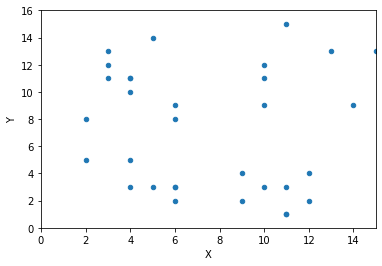

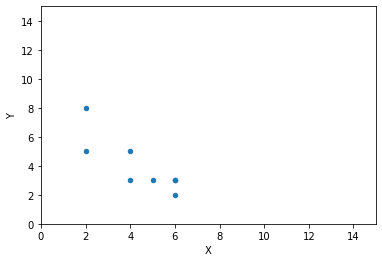

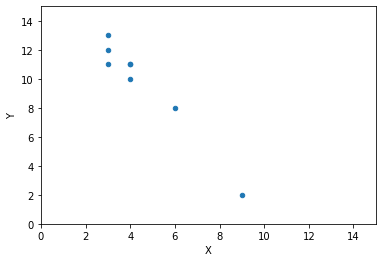

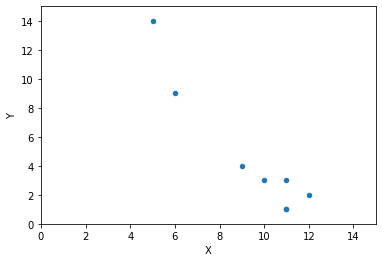

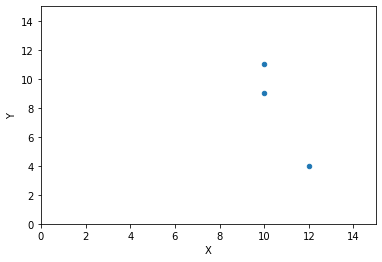

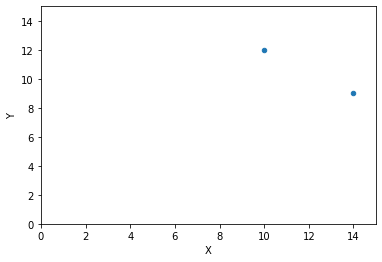

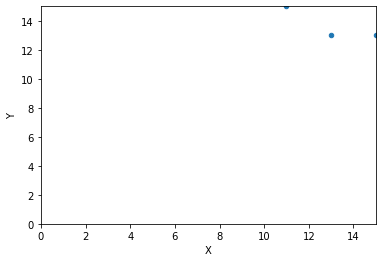

In [9]:
# for stratified analysis of data
import sys
sys.path.append('..\\..\\..\\..\\') #to pick up modules for these calcs. 
import calculate_multiple_regression as cmg
import pandas as pd

# read data into pandas frame.
input_file = "ExampleThree_Collider_NetworkValues.csv"
collider_data_frame = pd.read_csv(input_file)
#print(collider_data_frame)
#print(collider_data_frame.head())

# Analysing full dataset
cmg.multi_regress_from_dataframe(collider_data_frame)
all_data_plot = collider_data_frame.plot(x='X', y='Y', kind='scatter')
all_data_plot.set_xlim(0.0,15.0)
all_data_plot.set_ylim(0,16)

# stratified analysis follows
selection_set = []
set_counter = 0
value_increment = 1.5
value = 7.5  # start value for iterating through the data
selection = collider_data_frame.loc[collider_data_frame["B"] >= value]
while  len(selection) > 0:
    set_counter += 1
    new_value = value + value_increment * set_counter
    selection_set.append(selection.loc[selection["B"]< new_value])
    selection = collider_data_frame.loc[collider_data_frame["B"] >= new_value]
    
print(selection_set[2])
sorted = collider_data_frame.sort_values(by='B')

print(sorted)
for selection in selection_set:
    print("Number of rows in selection: ", len(selection))
    cmg.multi_regress_from_dataframe(selection)
    stratified_plot = selection.plot(x='X', y='Y', kind='scatter')
    stratified_plot.set_xlim(0.0,15)
    stratified_plot.set_ylim(0,15)